**DMML Task 1**

In [1]:
# Importing
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score, recall_score
import matplotlib.pyplot as plt

import time

import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

In [2]:
# data loading
data = pd.read_csv('/content/customer-churn-data.csv')

## DATA PREPROCESSING

In [3]:
data.head(10)

,CustomerID,Age,Gender,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
5,6,57,Male,190.43,255.19,19,85,417.78,5,1,4,130,False,Unsubscribed,False
6,7,27,Male,172.13,3512.55,3,77,316.18,0,3,1,61,True,Unsubscribed,False
7,8,37,Other,88.90,7270.90,4,87,63.61,3,4,3,224,False,Ignored,False
8,9,39,Other,24.46,4935.49,1,21,173.80,9,2,4,126,True,Responded,True
9,10,68,Other,169.59,9803.57,17,34,481.18,6,1,2,171,True,Unsubscribed,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1000 non-null   int64  
 1   Age                   1000 non-null   int64  
 2   Gender                1000 non-null   object 
 3   AnnualIncome          1000 non-null   float64
 4   TotalSpend            1000 non-null   float64
 5   YearsAsCustomer       1000 non-null   int64  
 6   NumOfPurchases        1000 non-null   int64  
 7   AvgTransactionAmount  1000 non-null   float64
 8   NumOfReturns          1000 non-null   int64  
 9   NumOfSupportQueries   1000 non-null   int64  
 10  SatisfactionScore     1000 non-null   int64  
 11  LastPurchaseDaysAgo   1000 non-null   int64  
 12  EmailOptIn            1000 non-null   bool   
 13  PromotionResponse     1000 non-null   object 
 14  Churn                 1000 non-null   bool   
dtypes: bool(2), float64(3)

In [5]:
data['Gender'].unique(),data['PromotionResponse'].unique()

(array(['Other', 'Male', 'Female'], dtype=object),
 array(['Responded', 'Ignored', 'Unsubscribed'], dtype=object))

Converting categorical to numeric

In [6]:
# labelling

mapping_dict = {'Responded': 1, 'Ignored': 0, 'Unsubscribed': -1}
data['PromotionResponse'] = data['PromotionResponse'].map(mapping_dict)

data['EmailOptIn'] = data['EmailOptIn'].astype(int)
data['Churn'] = data['Churn'].astype(str)

# One hot encoding

# Assuming df is your DataFrame and 'categorical_column' is the column you want to one-hot encode
categorical_column = data[['Gender']]

# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder()

# Fit and transform the data
onehot_encoded = onehot_encoder.fit_transform(categorical_column)

# Convert the one-hot encoded data to a DataFrame
onehot_encoded_df = pd.DataFrame(onehot_encoded.toarray(), columns=onehot_encoder.get_feature_names_out(['Gender']))

# Concatenate the original DataFrame with the one-hot encoded DataFrame
data = pd.concat([data, onehot_encoded_df], axis=1)

data.drop(columns=['Gender'], inplace=True)

#data['Gender_Other'],data['Churn'] = data['Churn'],data['Gender_Other']
###################################################################################################
# need to change names

In [7]:
# Normalizing
list = ['AnnualIncome','TotalSpend','AvgTransactionAmount']
for col in list:
  mean = data[col].mean()
  std = data[col].std()

  data[col] = (data[col] - mean) / std

In [8]:
data

,CustomerID,Age,AnnualIncome,TotalSpend,YearsAsCustomer,NumOfPurchases,AvgTransactionAmount,NumOfReturns,NumOfSupportQueries,SatisfactionScore,LastPurchaseDaysAgo,EmailOptIn,PromotionResponse,Churn,Gender_Female,Gender_Male,Gender_Other
0,1,62,-1.264341,0.283631,5,22,1.281408,2,0,3,129,1,1,True,0.0,0.0,1.0
1,2,65,-0.614126,1.378235,13,77,-1.672522,2,2,3,227,0,1,False,0.0,1.0,0.0
2,3,18,-1.566361,-1.558969,13,71,-1.483111,5,2,2,283,0,1,True,0.0,1.0,0.0
3,4,21,-0.611855,1.407873,3,33,0.993693,5,3,5,226,1,0,True,0.0,0.0,1.0
4,5,21,-0.649135,0.108342,15,43,-1.135824,3,0,5,242,0,-1,False,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,0.600957,-1.394665,2,29,-1.296511,0,3,2,88,1,0,False,0.0,1.0,0.0
996,997,19,0.988323,-0.482353,9,90,-1.593344,6,4,4,352,0,1,True,0.0,1.0,0.0
997,998,47,0.025491,-1.528565,17,69,-0.545038,7,3,1,172,1,-1,False,1.0,0.0,0.0
998,999,23,-0.737697,-0.415493,7,31,1.487066,1,2,5,55,0,1,True,0.0,1.0,0.0


In [9]:
# Train - Test split
X = pd.concat([data.iloc[:,1:13], data.iloc[:,14:]], axis=1)
y = data.iloc[:, 13]
y = pd.Series(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
y.value_counts()

True     526
False    474
Name: Churn, dtype: int64

## Adaboost Model

In [11]:
# Start measuring time
start_time = time.time()

# Initialize base learner (decision tree)
base_classifier = DecisionTreeClassifier(max_depth=1)
#base_classifier = DecisionTreeClassifier(min_impurity_decrease=0.3)


# Initialize AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=5, random_state=42)

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

# End measuring time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Time taken for Adaboost model to run:", elapsed_time, "seconds")

# Make predictions on the test set
y_pred = adaboost_classifier.predict(X_test)

y_pred1 = adaboost_classifier.predict(X_train)
accuracy1 = accuracy_score(y_train, y_pred1)
# Evaluate the performance of the AdaBoost classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy),print("Accuracy:", accuracy1)


Time taken for Adaboost model to run: 0.025696992874145508 seconds
Accuracy: 0.51
Accuracy: 0.5725


(None, None)

In [12]:
df1 = pd.DataFrame({"y_pred":y_pred,"y_test": y_test})
df2 = pd.DataFrame({"y_pred":y_pred1,"y_test": y_train})

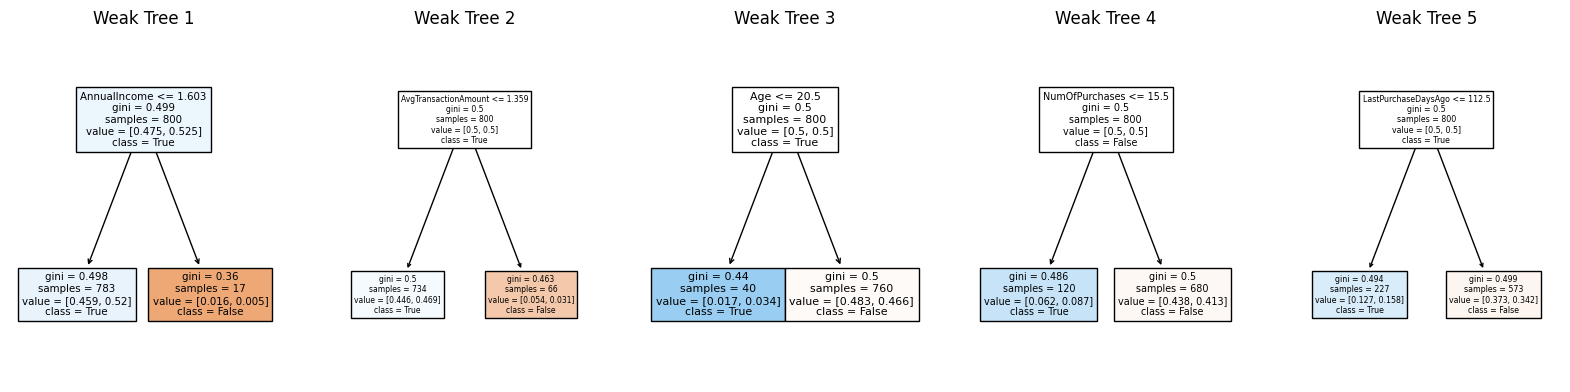

In [13]:
# Plot individual weak trees
plt.figure(figsize=(20, 10))
for i, estimator in enumerate(adaboost_classifier.estimators_):
    plt.subplot(2, 5, i+1)  # Adjust subplot arrangement as needed
    plot_tree(estimator, filled=True, class_names=adaboost_classifier.classes_, feature_names=X_train.columns)
    plt.title(f"Weak Tree {i+1}")

plt.show()

In [14]:
# Weighted Predictions
print("\nWeighted Predictions:")
print("Predictions from each weak learner:", adaboost_classifier.estimator_weights_)


Weighted Predictions:
Predictions from each weak learner: [1. 1. 1. 1. 1.]


In [15]:
print("\nFeature Importance:")
feature_importances = adaboost_classifier.feature_importances_
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {importance}")


# from here imortant features are AnnualIncome, TotalSpend, LastPurchaseDaysAgo
# Also check if it is true by visualizing it


Feature Importance:
Feature 1: 0.2
Feature 2: 0.2
Feature 3: 0.0
Feature 4: 0.0
Feature 5: 0.2
Feature 6: 0.2
Feature 7: 0.0
Feature 8: 0.0
Feature 9: 0.0
Feature 10: 0.2
Feature 11: 0.0
Feature 12: 0.0
Feature 13: 0.0
Feature 14: 0.0
Feature 15: 0.0


## Random Forest Model

In [16]:
# Define the Random Forest classifier
rf_clf = RandomForestClassifier()

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=30,oob_score=True, random_state=42)

# Train the classifier
rf_classifier.fit(X, y)

# End measuring time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Time taken for RandomForest model to run:", elapsed_time, "seconds")

# Make predictions on the test set
#y_pred = rf_classifier.predict(X_test)

# Get the OOB error
oob_error = 1 - rf_classifier.oob_score_
print(oob_error)

Time taken for RandomForest model to run: 1.3412411212921143 seconds
0.5


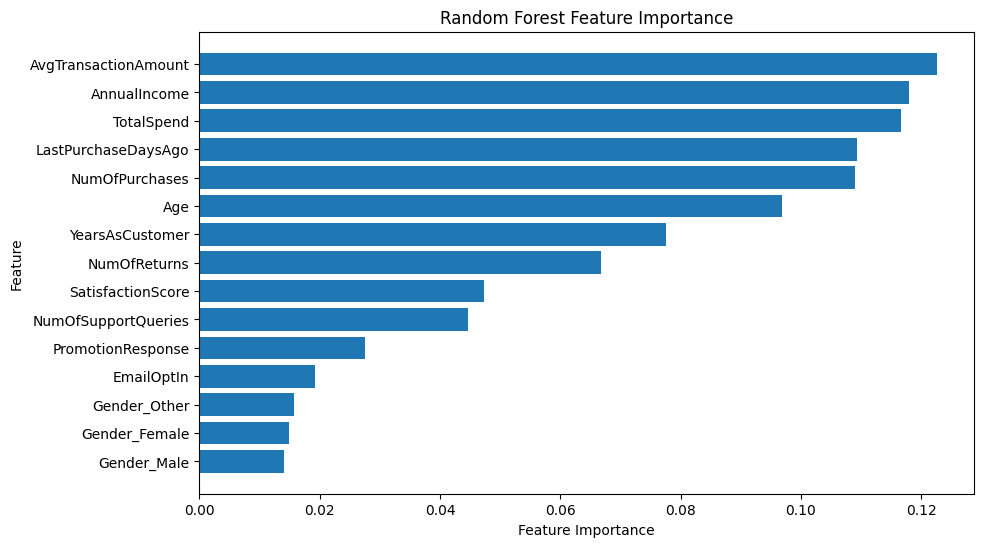

In [17]:
# Feature Importance
feature_importances = rf_classifier.feature_importances_
sorted_indices = feature_importances.argsort()
# Plot Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_indices)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), [X.columns[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.show()

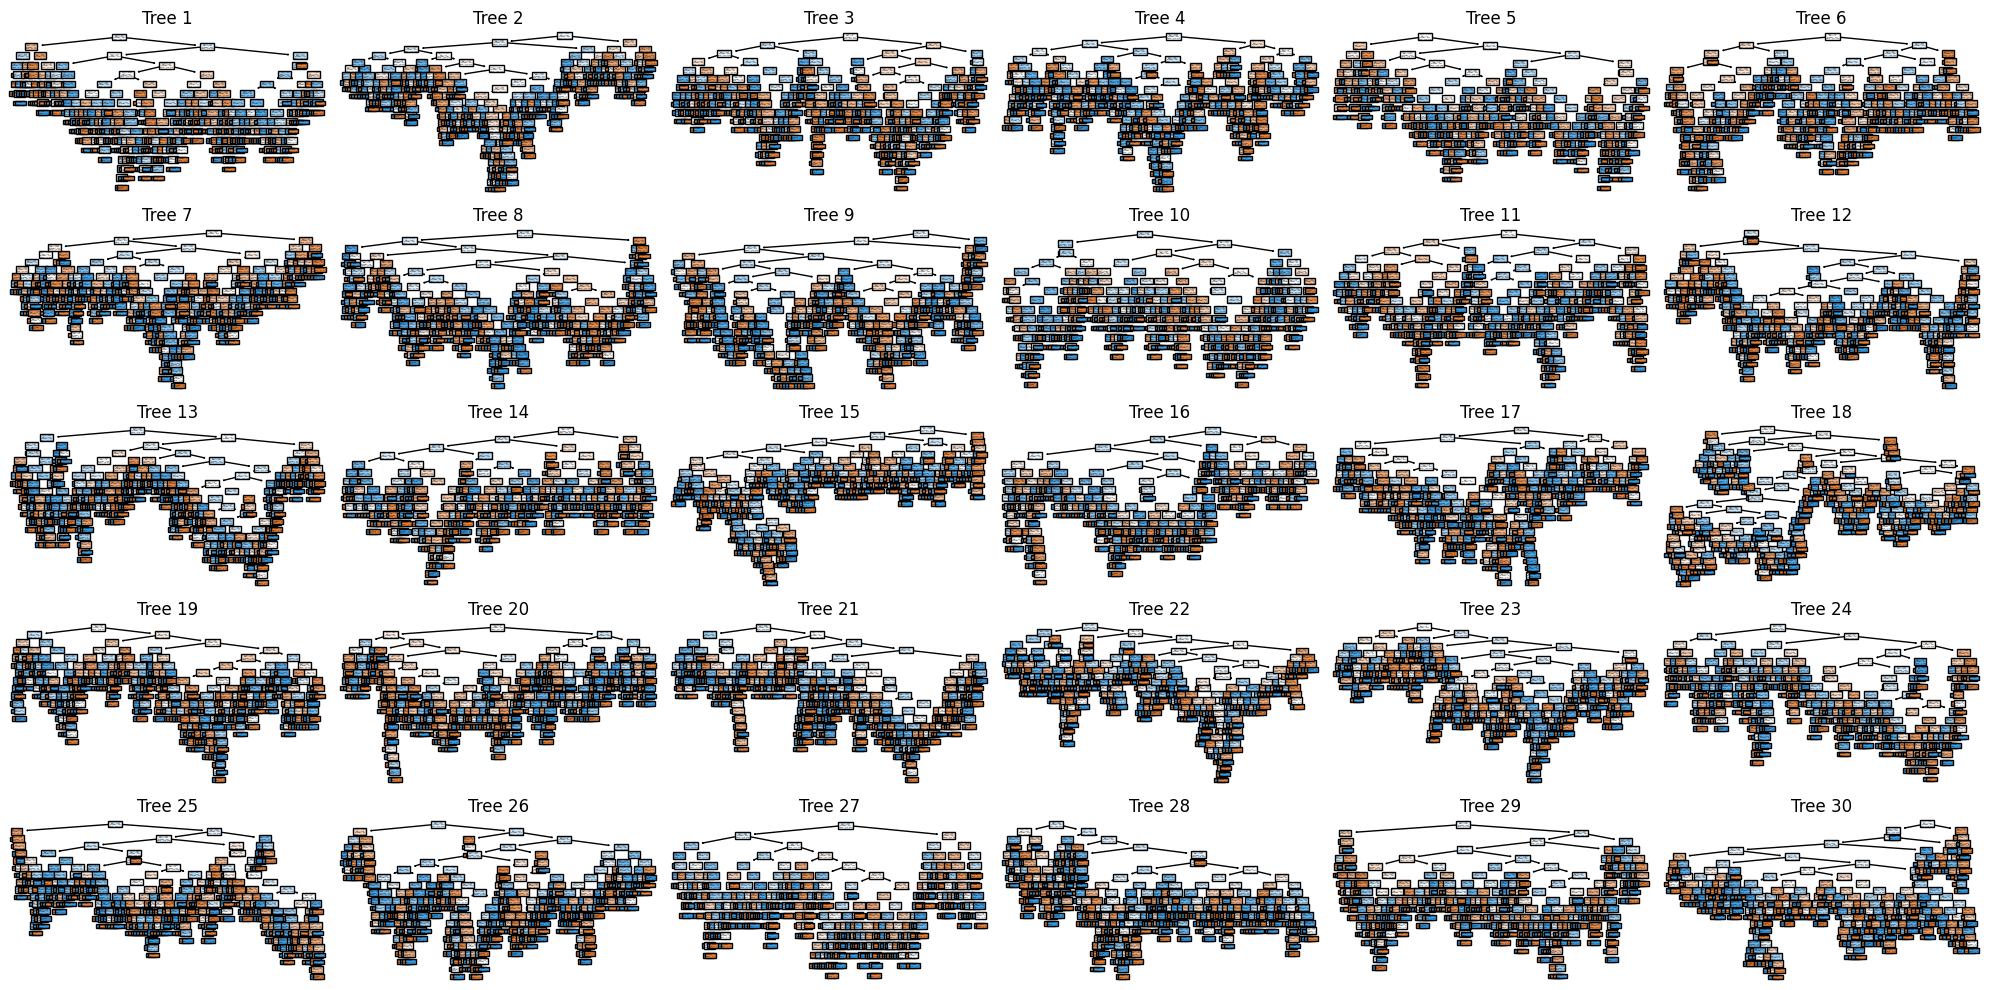

In [18]:
# Visualize Individual Trees
plt.figure(figsize=(20, 10))
for i in range(len(rf_classifier.estimators_)):
    plt.subplot(5, 6, i+1)  # Adjust subplot arrangement as needed
    plot_tree(rf_classifier.estimators_[i], filled=True)
    plt.title(f'Tree {i+1}')
plt.tight_layout()
plt.show()